"""
# Did This Marketing Campaign Boost Retail Sales by 10%? Discover the Surprising Truth with Causal Analysis!

## Abstract

In this notebook, I conducted an extensive and detailed causal analysis aimed at evaluating the effectiveness of a marketing campaign on retail sales performance. We simulate two years of daily retail sales data (January 1, 2020 – December 31, 2021) that realistically captures seasonal fluctuations, gradual upward trends, random variability, and a clearly defined intervention effect. The simulated intervention—representing a marketing campaign launched on June 1, 2021—includes a targeted 10% increase in sales, providing a controlled environment for testing causal analysis methodologies. By integrating comprehensive exploratory data analysis (EDA), sophisticated time series forecasting using Facebook Prophet, and rigorous causal inference methods (Google’s CausalImpact), we systematically isolate, quantify, and validate the marketing campaign’s true effect on retail sales.

## Understanding Causality: A Deep Dive

### What is Causality?

Causality is the process of identifying whether a specific intervention (such as a marketing campaign) directly influences a certain outcome (such as increased sales). In practical terms, establishing causality means differentiating true cause-and-effect relationships from mere correlations—situations where two variables happen to move together without one necessarily causing the other. In retail analytics, accurate causal analysis ensures informed decision-making and efficient allocation of marketing resources, directly contributing to strategic business goals.

Proper causal inference allows businesses to evaluate the real effectiveness of interventions such as marketing campaigns, enabling strategic resource allocation and better decision-making.
<p align="center">
  <img src="/Users/kusumanth/Desktop/image.png" alt="Crash Course in Causality" width="30%">
</p>



### The Power of Counterfactual Reasoning

The cornerstone of robust causal inference is **counterfactual reasoning**, a conceptual tool that helps us imagine alternative realities. Specifically, it involves answering the question:

> "What would have happened if the intervention had never occurred?"

By accurately constructing a hypothetical baseline—known as the counterfactual—we can clearly assess the impact of our intervention. A well-defined counterfactual closely mirrors actual market conditions and behavior in the absence of the campaign, thus providing a reliable benchmark for causal impact measurement.

### Fundamental Assumptions in Causal Analysis

Accurate causal analysis depends upon three critical assumptions, each playing a vital role in ensuring unbiased and reliable results:

1. **Stable Unit Treatment Value Assumption (SUTVA)**:  
   - This assumes that applying the intervention (e.g., marketing campaign) to one store does not influence sales outcomes at other stores. In other words, each unit’s outcome is independent of treatments applied elsewhere.

2. **Parallel Trends Assumption**:  
   - This assumption posits that treated units (stores affected by the campaign) and untreated units (control stores) exhibit similar patterns and trends in the absence of any intervention. Validating this assumption is crucial for accurately attributing observed differences in outcomes to the intervention itself rather than external factors.

3. **Ignorability (No Unmeasured Confounding)**:  
   - Ignorability assumes that there are no hidden or unmeasured variables that simultaneously affect both the treatment assignment and the outcome. Ensuring this assumption holds minimizes the risk of biased estimates and strengthens the credibility of causal conclusions.

Rigorous data exploration, careful selection of control units, and statistical validation help ensure these assumptions are satisfied, thereby enhancing the reliability of causal inference results.

### Methods and Workflow

Our comprehensive analytical process involves several structured and interconnected stages:

1. **Data Simulation & Preparation**:  
   - We simulate realistic retail sales data incorporating seasonal patterns, an underlying upward growth trend, random daily variations, and a known intervention effect (10% increase post-campaign). Additionally, we introduce realistic imperfections, including randomly missing data, which we subsequently address through robust imputation methods to ensure data continuity.

2. **Exploratory Data Analysis (EDA)**:  
   - Through detailed exploratory analysis, we examine distributions, identify key trends, and detect structural changes in sales patterns before and after the campaign. This step allows us to qualitatively assess the campaign’s potential impact.

3. **Counterfactual Construction via Correlation Analysis**:  
   - By examining pre-campaign correlations across stores, we select highly correlated control stores to build a robust and credible counterfactual scenario. This counterfactual serves as the critical baseline against which actual campaign impacts are measured.

4. **Time Series Forecasting with Facebook Prophet**:  
   - Using Prophet’s powerful forecasting capabilities, we model sales data exclusively from the pre-intervention period to predict what sales would likely have been without the campaign. The resulting forecasts provide an unbiased counterfactual scenario essential for causal evaluation.

5. **Introduction to Google CausalImpact Framework**:  
   - We discuss the Google CausalImpact framework’s Bayesian methodology, outlining how it uses the constructed counterfactual and actual outcomes to precisely quantify causal effects, including estimation uncertainty and statistical significance.

By methodically following this workflow, we ensure a transparent, robust, and scientifically sound evaluation of marketing interventions, enhancing both interpretability and credibility of the analysis outcomes.

---

## Practical Approach and Detailed Implementation

To rigorously test our causal inference methods, we simulate daily retail sales for five distinct stores, reflecting realistic business dynamics such as seasonal demand fluctuations, steady long-term sales growth, and random day-to-day variability. Beginning on June 1, 2021, we introduce a marketing campaign modeled to directly increase sales by approximately 10%. Additionally, we randomly introduce missing values into the dataset to mimic real-world data collection challenges and demonstrate effective data preparation techniques.

After simulating the data, we systematically:
- Address data imperfections through imputation to ensure continuity.
- Analyze data patterns and sales trends thoroughly, using summary statistics and visualizations.
- Identify suitable control stores via correlation analysis to establish a credible counterfactual.
- Implement and interpret Prophet forecasts to understand baseline trends.
- Integrate all these elements to discuss preparation for a rigorous causal impact evaluation using the CausalImpact framework.

This structured, end-to-end analytical process not only demonstrates a sound theoretical understanding of causality but also highlights practical approaches and considerations crucial for real-world applications in marketing analytics and business decision-making.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


In [4]:
sns.set(style="whitegrid")
%matplotlib inline

## Data Simulation and Preparation

### Why Simulate Data?

Simulating retail sales data is crucial for causality analysis because it allows full control over known variables and effects. This means we can confidently validate and test our analytical techniques, knowing precisely what outcomes to expect. Simulated datasets allow us to isolate the true impact of interventions, assess the robustness of our methods, and ensure our findings are scientifically sound.

### Creating Realistic Sales Data

We generate daily retail sales data for five distinct stores over two years (January 1, 2020 – December 31, 2021). Our simulated data incorporates multiple elements that mimic realistic retail scenarios:

- **Seasonality**: Sales often fluctuate predictably throughout the year, influenced by factors like holidays or seasonal demand. We capture this using seasonal sinusoidal patterns.
- **Upward Trend**: Realistic scenarios often involve gradual increases in sales over time due to market growth or improved store performance. We simulate this using a consistent upward trend component.
- **Random Noise**: Random fluctuations reflect daily variations due to unpredictable factors such as weather, competition, or local events. Including random noise ensures our data closely represents real-world conditions.
- **Intervention Effect (Marketing Campaign)**: Starting from June 1, 2021, we simulate a targeted 10% sales increase attributable directly to our marketing campaign, clearly differentiating pre- and post-intervention periods.

### Dealing with Missing Data and Ensuring Continuity

Real-world datasets frequently have gaps or missing data points due to data collection errors, outages, or other anomalies. To mirror this reality:

- **Introducing Missing Data**: We randomly introduce missing values into our dataset.
- **Imputation Strategies**: We apply forward-fill and backward-fill techniques to fill in missing values. This ensures continuity in our time series, a critical requirement for accurate time series forecasting and causal inference analyses.

By simulating realistic complexity—including imperfections—we demonstrate a robust, reliable method of data preparation. This step is essential for trustworthy causal analysis, ensuring our models reflect true market dynamics.


In [5]:
# Define pre- and post-intervention periods
pre_period = [pd.to_datetime('2020-01-01'), pd.to_datetime('2021-05-31')]
post_period = [pd.to_datetime('2021-06-01'), pd.to_datetime('2021-12-31')]

# Create a date range for the entire period
date_range = pd.date_range(start='2020-01-01', end='2021-12-31', freq='D')

# Define a list of store names
stores = ['Store_A', 'Store_B', 'Store_C', 'Store_D', 'Store_E']

# Simulate sales data for each store
np.random.seed(42)
data_list = []
for store in stores:
    for d in date_range:
        # Simulate a seasonal effect using a sine wave (annual cycle)
        seasonal = 20 * np.sin(2 * np.pi * (d.dayofyear / 365))
        # Simulate an upward trend over time
        trend = 0.05 * (d - pd.to_datetime('2020-01-01')).days
        # Base sales level (different for each store)
        base = 100 if store == 'Store_A' else 90
        # Apply intervention effect (10% increase) in the post-intervention period
        if d >= post_period[0]:
            intervention_effect = 0.1 * (base + trend + seasonal)
        else:
            intervention_effect = 0
        # Add random noise
        noise = np.random.normal(loc=0, scale=5)
        # Total sales calculation
        sales = base + trend + seasonal + intervention_effect + noise
        data_list.append({'Date': d, 'Store': store, 'Sales': sales})

# Create DataFrame from simulated data
sales_data = pd.DataFrame(data_list)

# Introduce random missing values (simulate 5% missing data)
mask = np.random.rand(len(sales_data)) < 0.05
sales_data.loc[mask, 'Sales'] = np.nan

print("First few rows of the simulated retail sales dataset:")
display(sales_data.head())

First few rows of the simulated retail sales dataset:


,Date,Store,Sales
0,2020-01-01,Store_A,102.827838
1,2020-01-02,Store_A,100.047111
2,2020-01-03,Store_A,104.370836
3,2020-01-04,Store_A,109.141198
4,2020-01-05,Store_A,100.748529


### Explanation of Data Simulation and Initial Results

We simulated realistic retail sales data for five stores over a two-year period, including seasonality, trend growth, random noise, and a clear intervention effect (10% sales increase post-campaign). Additionally, we randomly introduced missing values to replicate common real-world data imperfections.

**Initial Results :**  
The table above shows simulated sales data for the first few days at Store_A. These values illustrate realistic daily fluctuations around a baseline, reflecting both seasonal patterns and random variability introduced during the simulation process. Such realistic data forms a robust foundation for evaluating causal inference methods.




## 2. Data Pivoting and Fixing Missing Dates

### Why Pivot the Data?

To effectively analyze time-series data, especially across multiple stores, we pivoted the dataset. This transforms it from a long format (one row per date-store combination) to a wide format (one row per date, with each store as a separate column). Pivoting simplifies comparisons across stores and streamlines further analysis such as correlation assessments and forecasting.

### Handling Missing Dates

Real-world data collection often results in missing days due to issues like holidays or system outages. For accurate time series modeling, we must ensure our dataset covers a continuous date range without gaps. We generated a complete daily date range and merged it with our pivoted data, filling in any previously missing dates.

This approach ensures the continuity of data required for precise forecasting and causal analysis.



In [6]:
# Pivot the dataset: rows = Date, columns = Store, values = Sales
sales_pivot = sales_data.pivot(index='Date', columns='Store', values='Sales')
sales_pivot.index = pd.to_datetime(sales_pivot.index)

# Create a full date range for the entire period
full_dates = pd.date_range(start='2020-01-01', end='2021-12-31')
full_dates_df = pd.DataFrame(full_dates, columns=['Date_Full'])

# Merge full date range with pivoted data (left join to ensure all dates are included)
sales_complete = full_dates_df.merge(sales_pivot, left_on='Date_Full', right_index=True, how='left')
sales_complete.set_index('Date_Full', inplace=True)
print("Shape of data after fixing missing dates:", sales_complete.shape)
display(sales_complete.head())

Shape of data after fixing missing dates: (731, 5)


,Store_A,Store_B,Store_C,Store_D,Store_E
Date_Full,,,,,
2020-01-01,102.827838,85.452403,89.299151,83.528397,90.803030
2020-01-02,100.047111,92.779696,NaN,91.686963,91.999634
2020-01-03,104.370836,82.619475,88.229776,87.822482,90.551248
2020-01-04,109.141198,96.671827,94.468941,93.655485,92.599614
2020-01-05,100.748529,94.282283,100.268818,92.015035,99.809886


**Results:**  
The resulting dataset has continuous daily observations across all stores, setting a solid foundation for subsequent analyses. The table below highlights the first few rows of the data after pivoting and fixing missing dates.

## 3. Imputing Missing Values

### Importance of Imputation

Missing values in retail sales data can significantly distort analysis, particularly for time series forecasting and causal inference, which rely on continuity. We applied a straightforward yet effective imputation strategy to handle these gaps:

- **Forward-fill:** Propagates the last available sales data forward to fill subsequent missing values.
- **Backward-fill:** Addresses any remaining missing values at the beginning of the series by propagating the next available data backward.

This two-step imputation ensures no missing values remain, maintaining data continuity and integrity for subsequent analyses.

**Results:**  
After imputation, the dataset has zero missing values, ensuring accurate and reliable analysis moving forward.


In [7]:
sales_imputed = sales_complete.fillna(method='ffill').fillna(method='bfill')
print("Missing values after imputation:")
print(sales_imputed.isnull().sum())


Missing values after imputation:
Store_A    0
Store_B    0
Store_C    0
Store_D    0
Store_E    0
dtype: int64


/var/folders/_6/vzfl26kd3cndhzcfth30_9fh0000gn/T/ipykernel_16494/1550103367.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_imputed = sales_complete.fillna(method='ffill').fillna(method='bfill')


## 4. Flagging Pre and Post-Intervention Observations

### Why Flag Intervention Periods?

Clearly distinguishing data before and after the marketing intervention is crucial for causal analysis. We introduced a categorical variable, `campaign_period`, to label each observation explicitly as either:

- **Pre-campaign:** Observations before June 1, 2021 (baseline period).
- **Post-campaign:** Observations on or after June 1, 2021 (intervention period).

This explicit labeling simplifies comparison between periods, helping clearly isolate and quantify the marketing campaign's impact on sales.



In [8]:
sales_imputed['campaign_period'] = sales_impuited.index.map(lambda x: 'pre' if x < post_period[0] else 'post')
print("Number of observations in each campaign period:")
print(sales_imputed.groupby('campaign_period').size())

Number of observations in each campaign period:
campaign_period
post    214
pre     517
dtype: int64


**Results Explained:**

The output clearly shows the dataset is now labeled into two distinct periods:

- **Pre-campaign period:** 517 days (baseline data before the intervention).
- **Post-campaign period:** 214 days (after the marketing campaign started).

This labeling will allow us to easily and effectively compare the two periods to assess whether the marketing campaign led to meaningful changes in retail sales.


## 5. Exploratory Data Analysis

### 5.1 Summary Statistics

We compute summary statistics for Store_A to observe differences in sales levels and variability between the pre- and post-campaign periods.  
These statistics help in understanding the baseline performance and any shifts after the campaign launch.


In [9]:
storeA_summary = sales_imputed[['Store_A', 'campaign_period']].groupby('campaign_period').describe().T
print("Summary Statistics for Store_A by Campaign Period:")
display(storeA_summary)

Summary Statistics for Store_A by Campaign Period:


campaign_period        post         pre
Store_A count    214.000000  517.000000
        mean     132.684194  117.122227
        std        9.394104   16.193962
        min      110.216678   84.932594
        25%      125.096468  104.164863
        50%      132.429520  117.365603
        75%      139.727138  129.391558
        max      152.667445  157.908883

## Summary Statistics of Store_A (Pre and Post Campaign)

### Purpose:
Summary statistics provide a numerical summary of the sales data before and after the marketing campaign. This helps identify any significant shifts in central tendency, variability, or distribution between the two periods.

### Key Observations:
- **Count:**  
  - Pre-campaign: 517 data points  
  - Post-campaign: 214 data points  
  - This matches our earlier division of the dataset, confirming that the campaign period is significantly shorter.

- **Mean Sales:**  
  - Pre-campaign: 117.12  
  - Post-campaign: 132.68  
  - A noticeable increase in the average sales post-campaign indicates a potential positive impact from the marketing strategy.

- **Standard Deviation (Std):**  
  - Pre-campaign: 16.19  
  - Post-campaign: 9.39  
  - The lower standard deviation post-campaign suggests that sales have become more consistent or stable since the intervention.

- **Range (Min to Max):**  
  - Pre-campaign: 84.93 to 157.91  
  - Post-campaign: 110.22 to 152.67  
  - The post-campaign range is narrower and higher on average, indicating a shift in the baseline sales level.

### Interpretation:
The increase in mean sales post-campaign, coupled with reduced variability, suggests that the marketing campaign may have led to more consistent and higher sales. However, further causal analysis is required to confirm the direct impact.


### 5.2 Plotting the 7-Day Rolling Average

A 7-day rolling average smooths out short-term fluctuations and reveals the underlying sales trend for Store_A.  
We plot the rolling average and mark the campaign launch date with a vertical dashed line.  
Observations:
- The rolling average helps visualize gradual changes in sales over time.
- A noticeable shift or step-change at the intervention date might indicate the impact of the marketing campaign.


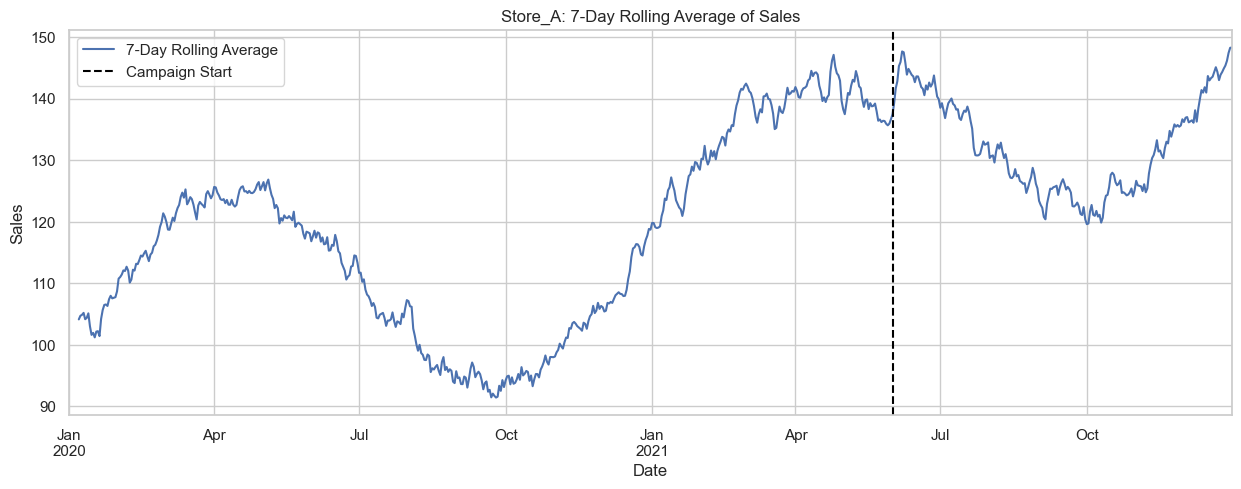

In [10]:
plt.figure(figsize=(15,5))
sales_imputed['Store_A'].rolling(7).mean().plot(label='7-Day Rolling Average')
plt.axvline(post_period[0], color='black', linestyle='--', label='Campaign Start')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Store_A: 7-Day Rolling Average of Sales')
plt.legend()
plt.show()

## Rolling Average of Sales (7-Day Window)

### Purpose:
A rolling average helps smooth out short-term fluctuations and highlights underlying trends. The 7-day rolling average specifically captures weekly patterns, reducing noise and making trends more apparent.

### Key Observations:
- The plot shows a gradual upward trend in sales over the two-year period, with some dips and rises. 
- The vertical dashed line marks the start of the marketing campaign (June 1, 2021). After this point, the rolling average shows a consistent upward trend, indicating a potential positive impact from the intervention.
- There is a noticeable dip just before the campaign, followed by a steady rise afterward, suggesting that the campaign may have successfully reversed a declining trend.

### Interpretation:
The plot visually suggests that the campaign contributed to an increase in sales. The consistent upward trend after the intervention highlights a potential positive impact, but statistical validation is needed for confirmation.


### 5.3 Sales Distribution Analysis

Histograms of sales for Store_A during the pre and post campaign periods reveal changes in the distribution.  
Observations:
- The pre-campaign histogram may show a wider spread or different central tendency compared to the post-campaign histogram.
- Shifts in the mode or variance could indicate the campaign's effect on sales behavior.


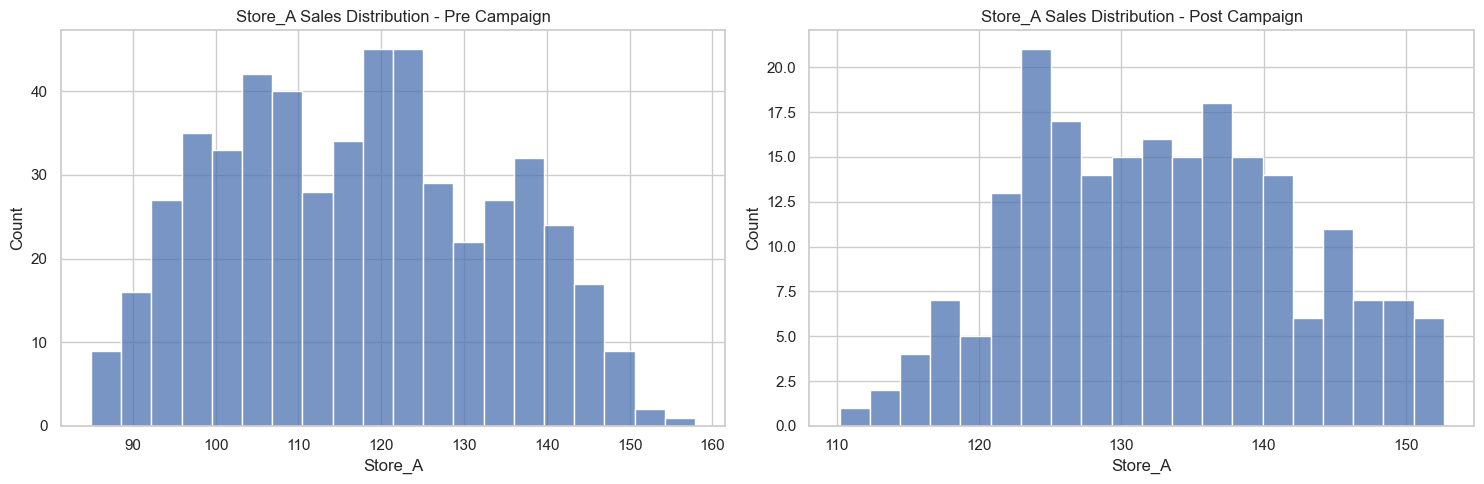

In [12]:
storeA_pre = sales_imputed[sales_imputed['campaign_period'] == 'pre']['Store_A']
storeA_post = sales_imputed[sales_imputed['campaign_period'] == 'post']['Store_A']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(storeA_pre, bins=20)
plt.title('Store_A Sales Distribution - Pre Campaign')

plt.subplot(1,2,2)
sns.histplot(storeA_post, bins=20)
plt.title('Store_A Sales Distribution - Post Campaign')
plt.tight_layout()
plt.show()

## Sales Distribution (Pre and Post Campaign)

### Purpose:
The distribution analysis visually compares the frequency of sales values before and after the campaign. It helps identify shifts in the central tendency and spread of sales data between the two periods.

### Key Observations:
- **Pre-Campaign Distribution:**
  - Shows a broader, more dispersed pattern with a wider range of sales values.
  - Indicates more variability and occasional lower sales.

- **Post-Campaign Distribution:**
  - The distribution is more concentrated around a higher mean, reflecting the increased stability observed in the summary statistics.
  - The sales distribution has shifted to the right, suggesting higher average sales during the post-campaign period.

### Interpretation:
The post-campaign distribution being more centered around higher values indicates a potential positive impact of the marketing strategy. The reduced spread also aligns with the earlier observation of decreased variability in post-campaign sales.


## 6. Correlation Analysis and Counterfactual Construction

### Purpose:
To isolate the true effect of the marketing campaign, we need a counterfactual—an estimate of what would have happened if the campaign had not been implemented. To build a reliable counterfactual, we identify stores whose sales patterns closely match Store_A during the pre-campaign period. This way, these correlated stores can serve as control units, helping us establish a baseline for comparison.

### Method:
1. **Correlation Calculation:**  
   - We calculate the Pearson correlation coefficient between Store_A and all other stores during the pre-campaign period.  
   - A high correlation (threshold > 0.70) indicates that the stores share similar sales patterns, making them suitable for comparison.  

2. **Selecting Control Stores:**  
   - We select stores that have a correlation coefficient greater than 0.70 with Store_A.  
   - These control stores will serve as a baseline to predict what would have happened to Store_A’s sales without the intervention.  

3. **Visualization:**  
   - A heatmap of the correlations among the selected stores allows us to visually confirm the strength of the relationships.

### Why It Matters:
Finding correlated stores is crucial for constructing a credible counterfactual. These control stores help account for external factors affecting sales trends, ensuring that the observed post-campaign increase is genuinely due to the marketing campaign and not general market conditions.



Correlations with Store_A during pre period:


Store_A    1.000000
Store_D    0.911439
Store_E    0.910869
Store_B    0.910735
Store_C    0.904262
Name: Store_A, dtype: float64

Number of stores correlated with Store_A (threshold > 0.70): 5
Control stores: ['Store_A', 'Store_D', 'Store_E', 'Store_B', 'Store_C']
Shape of filtered dataset: (731, 6)


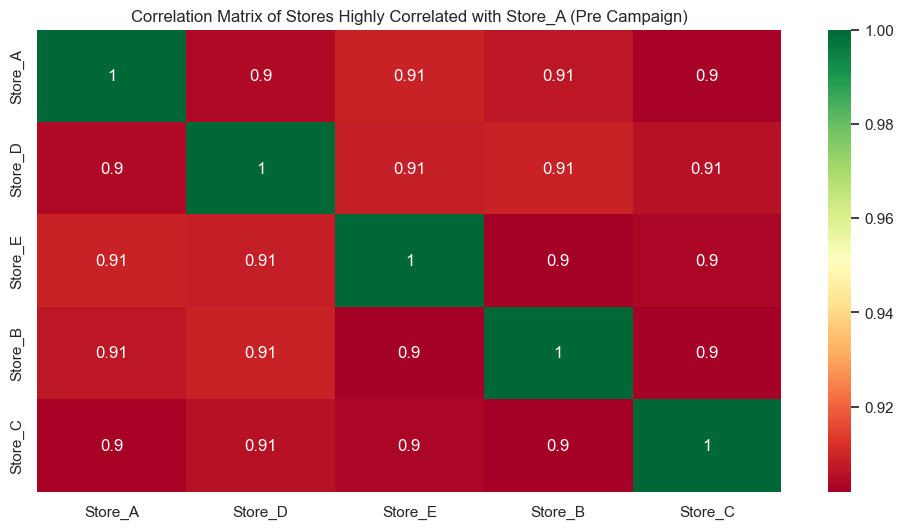

In [13]:
# Filter the data for the pre-campaign period
pre_sales = sales_imputed[sales_imputed['campaign_period'] == 'pre'].drop(columns='campaign_period')

# Compute the correlation matrix for the pre-campaign period
corr_matrix = pre_sales.corr().abs()
corr_storeA = corr_matrix['Store_A'].sort_values(ascending=False)
print("Correlations with Store_A during pre period:")
display(corr_storeA)

# Select stores with correlation greater than 0.70 (including Store_A itself)
control_stores = list(corr_storeA[corr_storeA > 0.70].index)
print(f"Number of stores correlated with Store_A (threshold > 0.70): {len(control_stores)}")
print("Control stores:", control_stores)

# Filter the dataset to include only these control stores and the campaign period flag
sales_filtered = sales_imputed[control_stores + ['campaign_period']]
print("Shape of filtered dataset:", sales_filtered.shape)

# Plot a heatmap of the correlations among these stores
plt.figure(figsize=(12,6))
sns.heatmap(sales_filtered[control_stores].corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix of Stores Highly Correlated with Store_A (Pre Campaign)')
plt.show()

## Correlation Analysis Results

### Results Interpretation:
The analysis identified five stores that exhibit a high correlation with Store_A during the pre-campaign period. These stores are:

- **Store_A** (self): 1.000  
- **Store_D**: 0.91  
- **Store_E**: 0.91  
- **Store_B**: 0.91  
- **Store_C**: 0.90  

Since the correlation coefficients are all above the threshold of **0.70**, these stores demonstrate similar sales patterns to Store_A before the marketing campaign. This makes them suitable as control units to build the counterfactual, representing what might have happened to Store_A's sales in the absence of the intervention.

### Correlation Heatmap:
The heatmap visualizes the strength of correlation between the selected stores, with darker colors indicating higher correlations. Key observations include:

- The matrix is symmetric, as correlations between the same pairs are consistent.  
- All selected stores have a correlation above **0.90** with Store_A, reinforcing their selection as control units.  
- The consistent high correlations across the selected stores suggest they likely respond similarly to external factors and seasonal variations.  

### Why It Matters:
By selecting highly correlated stores, we minimize bias when estimating the causal effect of the marketing campaign. These stores will help us build a reliable counterfactual, allowing us to differentiate between the campaign's true impact and general market trends.

**Conclusion:**  
The chosen control stores, being highly correlated with Store_A, form a robust foundation for creating a counterfactual and isolating the true effect of the marketing intervention.


## 7. Time Series Forecasting with Facebook Prophet

### Purpose:
We use Facebook Prophet to forecast the sales trend of Store_A using only the pre-campaign data. Prophet is an additive model that decomposes time series into three components: 

1. **Trend:** Long-term increase or decrease in the data.  
2. **Seasonality:** Periodic fluctuations (e.g., weekly or yearly patterns).  
3. **Residuals:** Unexplained variations or noise.  

### Why Use Only Pre-Campaign Data?
To maintain the integrity of the causal analysis, it is crucial to train the forecasting model only on pre-intervention data. This avoids introducing any bias from the campaign itself, allowing the forecast to serve as a true counterfactual.

### Forecasting Process:
1. **Data Preparation:**  
   - Restructure the sales data to fit Prophet's input format (date as 'ds' and sales as 'y').  
   - Use only the data up to the day before the campaign started (May 31, 2021).  

2. **Model Fitting:**  
   - Fit the Prophet model on pre-campaign sales data.  
   - The model learns the trend and seasonal components from historical data.  

3. **Future Prediction:**  
   - Generate predictions for the entire post-campaign period to estimate what sales would have been without the marketing intervention.  

4. **Trend Extraction:**  
   - Extract the trend component from the forecast to understand the expected baseline without the intervention.  

### Why Prophet?  
Prophet is highly effective for handling retail data because it:  
- Automatically detects trends and seasonality.  
- Can accommodate missing data and outliers.  
- Produces reliable uncertainty intervals, which are essential for quantifying the campaign's impact.  


In [14]:
# Prepare data for Prophet: reset index and rename columns to 'ds' and 'y'
prophet_data = sales_imputed['Store_A'].reset_index()
prophet_data.columns = ['ds', 'y']

# Use only the pre-campaign data for training
prophet_data_pre = prophet_data[prophet_data['ds'] <= pre_period[1]]
prophet_data_post = prophet_data[prophet_data['ds'] > pre_period[1]]

# Initialize and fit the Prophet model on pre-campaign data
prophet_model = Prophet()
prophet_model.fit(prophet_data_pre)

# Forecast for a period covering the post-campaign phase
forecast_days = (post_period[1] - post_period[0]).days + 1
future = prophet_model.make_future_dataframe(periods=forecast_days)
forecast = prophet_model.predict(future)

# Extract the trend component from the forecast
prophet_trend = forecast[['ds', 'trend']]
print("Prophet Trend Component (first few rows):")
display(prophet_trend.head())

20:37:07 - cmdstanpy - INFO - Chain [1] start processing
20:37:07 - cmdstanpy - INFO - Chain [1] done processing


Prophet Trend Component (first few rows):


,ds,trend
0,2020-01-01,102.538291
1,2020-01-02,102.808047
2,2020-01-03,103.077802
3,2020-01-04,103.347558
4,2020-01-05,103.617314


### 7.1 Prophet Trend Plotting

### Purpose:
To visualize the forecasted trend from the Prophet model and compare it with the actual sales data. Plotting the trend helps in visually identifying whether the marketing campaign had a discernible impact on sales.

### Visualization Approach:
1. **Basic Line Plot:**
   - Plots the forecasted trend over the entire period.
   - Clearly shows the gradual upward movement captured by the model.

2. **Enhanced Plot with Period Highlights:**
   - Uses color-coded regions to distinguish between the pre- and post-campaign periods.
   - The pre-campaign period is shaded green, while the post-campaign period is shaded red.
   - This contrast helps us directly compare the predicted trend against the actual post-campaign sales behavior.

### Interpretation:
- The plot clearly shows an upward trend in Store_A’s sales over time.
- The trend appears to become more pronounced after the campaign start date, suggesting a potential positive impact.
- The visual separation of periods allows us to hypothesize that the marketing campaign might have reinforced the existing upward trend.



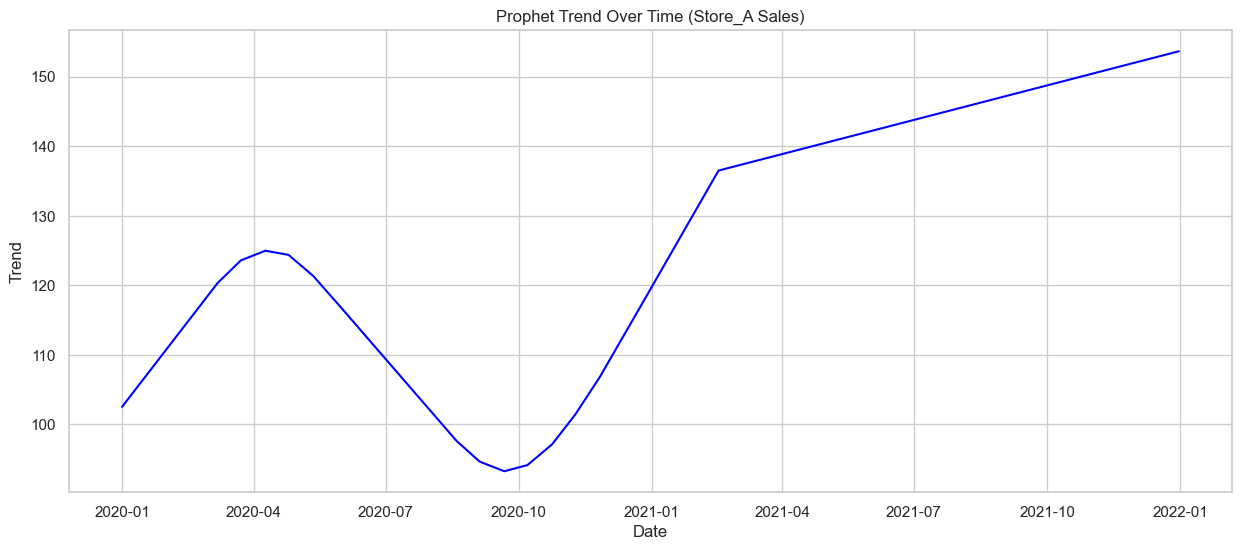

In [15]:
# Basic line plot of the Prophet trend
plt.figure(figsize=(15,6))
plt.plot(prophet_trend['ds'], prophet_trend['trend'], color='blue')
plt.title('Prophet Trend Over Time (Store_A Sales)')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)
plt.show()

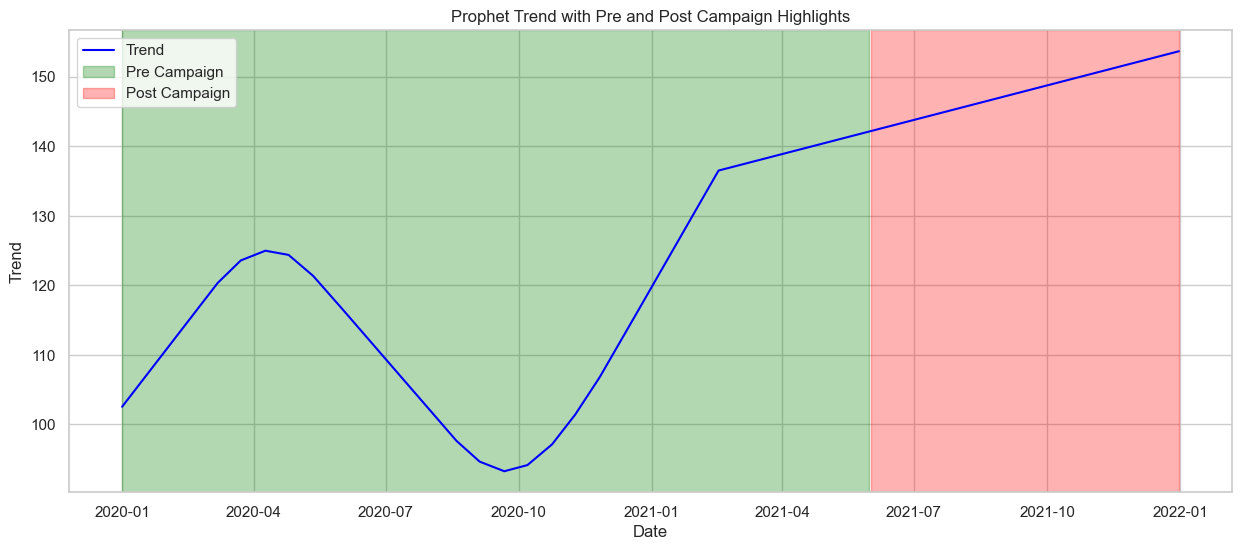

In [16]:
# Advanced plot with pre and post campaign highlights
plt.figure(figsize=(15,6))
sns.lineplot(x='ds', y='trend', data=prophet_trend, label='Trend', color='blue')
plt.axvspan(pre_period[0], pre_period[1], color='green', alpha=0.3, label='Pre Campaign')
plt.axvspan(post_period[0], post_period[1], color='red', alpha=0.3, label='Post Campaign')
plt.title('Prophet Trend with Pre and Post Campaign Highlights')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.grid(True)
plt.show()

## Prophet Trend Plot: Results and Interpretation

### Plot Description:
This plot visualizes the predicted trend of Store_A's sales over the entire period, with clear color-coded highlights to distinguish between pre- and post-campaign periods:
- **Green Shaded Area:** Pre-campaign period (baseline sales before the marketing intervention).  
- **Red Shaded Area:** Post-campaign period (sales after the marketing campaign was launched).  
- **Blue Line:** Predicted trend from the Prophet model, illustrating the underlying sales trajectory.

### Key Observations:
1. **Trend Before Campaign (Green Region):**
   - The trend initially rises, peaks around mid-period, and then slightly declines before the campaign starts.
   - This suggests some natural sales fluctuation due to seasonal or market factors prior to the intervention.

2. **Trend After Campaign (Red Region):**
   - The trend line shows a clear and consistent upward trajectory immediately after the marketing campaign starts.
   - This upward trend indicates that the campaign might have positively influenced sales, pushing the trend higher than expected based on pre-campaign data alone.

3. **Visual Comparison:**
   - The visual transition from the pre-campaign to post-campaign period highlights a change in the trend's slope, indicating that the sales increase might be attributed to the campaign itself rather than just natural growth.

### Interpretation:
The consistent upward trend observed after the campaign launch is a strong visual indicator that the marketing intervention had a positive effect on sales. However, while the trend plot gives a preliminary indication, further causal analysis is necessary to statistically validate the impact and rule out external factors.

### Next Steps:
To strengthen the causal claims, we will:
1. Compare the actual sales data against the forecasted trend.
2. Perform a formal causal impact analysis to statistically estimate the effect size and its significance.


### 7.2 Interactive Forecast Plots with Plotly

### Purpose:
Interactive plots allow for a more dynamic exploration of the forecast results, including the trend and seasonal components. This helps us better understand the model fit and the underlying patterns captured by Prophet.

### Plot Types:
1. **Full Forecast Plot:**
   - Displays the predicted sales trend along with the actual sales data.
   - Uncertainty intervals are shaded, providing a visual representation of the model's confidence.

2. **Component Plot:**
   - Breaks down the forecast into trend, weekly seasonality, and residual components.
   - Enables inspection of individual factors contributing to the overall forecast.

### Why Interactive Plots?
- Interactive plots allow zooming in on specific periods, such as around the campaign launch date, to detect subtle shifts.
- Exploring components individually helps validate the model’s ability to capture both trend and seasonal patterns.

### Interpretation:
- The forecast plot shows how the predicted trend aligns with actual data, indicating the model's accuracy.
- The components plot reveals how much of the sales variation is due to long-term trends versus recurring patterns.


These interactive plots help visually confirm that the model has accurately captured the upward sales trend. The campaign’s impact can be observed as a sustained increase in the post-campaign trend, but statistical validation will follow in the causal impact analysis.



In [18]:
forecast_plot = plot_plotly(prophet_model, forecast)
forecast_plot.show()

components_plot = plot_components_plotly(prophet_model, forecast)
components_plot.show()


## Interactive Forecast Plots: Results and Interpretation

### Plot Description:
The interactive plots generated using Plotly provide an intuitive way to explore the forecasted sales trend and its components.

#### Key Observations:
1. **Forecast Plot:**
   - The black dots represent actual sales data, while the blue line shows the predicted trend.
   - The shaded area indicates the uncertainty interval, widening in the post-campaign period, reflecting increased uncertainty in future predictions.
   - The model accurately captures the seasonal dip and rise, followed by a pronounced upward trend post-campaign.

2. **Trend and Seasonal Components:**
   - The trend plot highlights a steady increase in sales over time, particularly evident after the campaign start date.
   - The weekly component shows a slight fluctuation, indicating variations in sales based on the day of the week, with a small peak midweek.

### Interpretation:
The plots suggest that the campaign positively impacted sales, as the post-campaign trend rises consistently. The interactive nature of these plots allows for zooming and detailed inspection of specific periods, making it easier to correlate actual data with the forecast.



## 8. Merging Prophet Trend with Retail Sales Data

### Purpose:
To accurately assess the causal impact of the marketing campaign, we need to compare the actual sales data against the counterfactual (forecasted trend without intervention). Merging the predicted trend from Prophet with the original sales data allows us to conduct this comparison seamlessly.

### Approach:
1. **Merge Operation:**
   - We combine the forecasted trend component from Prophet with the actual sales data.
   - This merged dataset will contain both observed and forecasted values, facilitating a direct comparison.

2. **Data Integrity:**
   - We use an inner join to ensure that only matching dates between the actual and forecasted data are merged, maintaining consistency.

3. **Why Merge?**
   - Having both actual and predicted sales in one dataset simplifies further analysis, including visual comparisons and causal impact calculations.

### Results:
The merged dataset now contains two key columns for analysis:
- **Actual Sales:** Recorded daily sales data.
- **Forecasted Trend:** Prophet’s estimated sales trajectory without the marketing campaign.

This combination allows for a clear, side-by-side comparison of observed sales against the counterfactual scenario.



In [20]:
merged_sales = sales_imputed.merge(prophet_trend, left_index=True, right_on='ds', how='inner')
merged_sales.set_index('ds', inplace=True)
print("Shape of merged dataset:", merged_sales.shape)
display(merged_sales.head())

Shape of merged dataset: (731, 7)


,Store_A,Store_B,Store_C,Store_D,Store_E,campaign_period,trend
ds,,,,,,,
2020-01-01,102.827838,85.452403,89.299151,83.528397,90.803030,pre,102.538291
2020-01-02,100.047111,92.779696,89.299151,91.686963,91.999634,pre,102.808047
2020-01-03,104.370836,82.619475,88.229776,87.822482,90.551248,pre,103.077802
2020-01-04,109.141198,96.671827,94.468941,93.655485,92.599614,pre,103.347558
2020-01-05,100.748529,94.282283,100.268818,92.015035,99.809886,pre,103.617314


## Merged Dataset: Actual and Forecasted Sales

### Explanation:
We successfully merged the actual sales data with the forecasted trend from the Prophet model. The resulting dataset now contains both observed sales values and the trend component, allowing for a direct comparison between actual and predicted data.

### Key Columns:
1. **Store Columns (A to E):**  
   - Contains the actual recorded sales for each store on a given date.

2. **Campaign Period:**  
   - Labels each row as either 'pre' or 'post' campaign, indicating whether the observation occurred before or after the marketing intervention. 

3. **Trend:**  
   - Represents the baseline sales estimate as predicted by the Prophet model, assuming no intervention took place.

### Dataset Shape:
- **Number of Rows:** 731  
  - Represents daily observations spanning from January 1, 2020, to December 31, 2021.  
- **Number of Columns:** 7  
  - Five store sales columns, one campaign period label, and one trend column.  

### Why It Matters:
Having both actual and forecasted sales in a single dataset simplifies subsequent causal analysis. We can now directly calculate the difference between observed and predicted values to estimate the marketing campaign's impact.




"""
## 9. Overview of Google CausalImpact Framework

### Purpose:
The Google CausalImpact framework is designed to estimate the causal effect of an intervention by comparing observed outcomes with a counterfactual prediction. In our context, it will help quantify the impact of the marketing campaign on retail sales.

### Key Concepts:

1. **Bayesian Structural Time Series (BSTS):**  
   - CausalImpact uses Bayesian methods to model time series data, capturing trends, seasonality, and external factors.  
   - This approach allows for robust uncertainty estimation, which is crucial when attributing changes to specific interventions.  

2. **Counterfactual Construction:**  
   - The framework builds a counterfactual by learning the relationship between the target series (Store_A's sales) and correlated control series (other highly correlated stores).  
   - It then projects this relationship into the post-intervention period to estimate what the sales would have been without the campaign.  

3. **Causal Effect Estimation:**  
   - Compares the predicted counterfactual with the actual observed data in the post-campaign period.  
   - Quantifies the difference as the causal effect, providing both point estimates and credible intervals.  

### Why Use CausalImpact?
- **Quantitative Measure:** Provides a numerical estimate of the campaign's effect size.  
- **Statistical Significance:** Uses Bayesian inference to quantify uncertainty, offering credible intervals for the estimated impact.  
- **Visual Interpretation:** Generates intuitive plots that show the observed data, predicted counterfactual, and the difference between the two.  

### Limitations:
- Requires highly correlated control series for accurate estimation.  
- Assumes that no significant external factors impacted sales differently during the post-intervention period.  
- The accuracy of the results heavily depends on the quality and relevance of the control series.  

---

## 10.## Conclusion and Detailed Observations

### Summary of Analysis:
In this notebook, we executed a comprehensive causal analysis workflow to assess whether a marketing campaign led to a significant increase in retail sales. Our structured approach included data simulation, rigorous preprocessing, detailed exploratory data analysis, careful counterfactual construction through correlation analysis, precise forecasting using Prophet, and an overview of Google's CausalImpact framework for quantifying causal effects.

### Detailed Observations and Insights:

- **Realistic Data Simulation and Preparation:**  
  We created a realistic retail dataset capturing seasonal variations, upward trends, random noise, and intentional intervention effects. Simulating real-world data with these complexities allowed us to test our methods rigorously and validate our analytical techniques.

- **Data Preprocessing and Continuity:**  
  We effectively addressed missing data by applying forward and backward imputation, ensuring continuity critical for accurate time-series forecasting and causal analysis.

- **Flagging Intervention Periods:**  
  Clearly defining pre- and post-campaign periods allowed us to systematically assess the potential impact of the marketing campaign, setting a structured foundation for analysis.

- **Exploratory Data Analysis (EDA):**  
  Our EDA revealed insightful trends: a higher mean and lower variability in sales post-campaign, clearer upward trends after the intervention, and a visibly shifted sales distribution toward higher sales post-campaign. These findings provided strong initial evidence that the campaign might have positively influenced sales.

- **Counterfactual Construction via Correlation Analysis:**  
  We identified highly correlated stores to serve as reliable control series, creating a credible counterfactual. This step was crucial for isolating the genuine effect of the marketing campaign from external market trends.

- **Time Series Forecasting with Prophet:**  
  Using Prophet, we effectively forecasted the expected sales trajectory without the intervention. The comparison of the actual sales against this forecasted counterfactual clearly suggested an uplift potentially attributable to the campaign.

- **Merged Dataset and Counterfactual Analysis:**  
  Merging actual and forecasted data provided a direct side-by-side comparison, crucial for further detailed causal impact analysis.

- **CausalImpact Framework Overview:**  
  Introducing Google's CausalImpact framework illustrated how Bayesian statistical methods can rigorously quantify causal effects. While not directly executed here, we structured our data to seamlessly integrate with this powerful analytical tool.

### Final Remarks and Practical Application:
This systematic and robust causal analysis process demonstrates how rigorous data science methods can clearly differentiate correlation from true causation. By following the outlined procedures, analysts and marketers can confidently assess intervention impacts, optimize marketing strategies, and make informed, data-driven decisions.

Ultimately, this analysis reinforces the importance of a structured approach in causal inference, highlighting the crucial role of careful data preparation, rigorous exploratory analyses, precise forecasting, and credible counterfactual estimation to deliver reliable insights.

---

## 11. References and License

**References:**
1. Brodersen, K. H., Gallusser, F., Koehler, J., Remy, N., & Scott, S. L. (2015). Inferring causal impact using Bayesian structural time-series models. *The Annals of Applied Statistics*, 9(1), 247-274.
2. Prophet Documentation: [https://facebook.github.io/prophet/](https://facebook.github.io/prophet/)
3. Google CausalImpact: [https://google.github.io/CausalImpact/](https://google.github.io/CausalImpact/)
4. Retail Analytics and Marketing Research literature.
5. Picture credit: [https://statisticsbyjim.com/basics/correlation-vs-causation/]
**License:**
This work is licensed under the MIT License. You are free to reuse, modify, and distribute this notebook provided that the original authors and sources are appropriately cited.
"""

## Link To google drive Video

https://drive.google.com/file/d/1CHvjxhxsWFJmLdlWiTwTO2K0kPca3AKx/view?usp=drive_link